# Module 8 - Logistic Regression

In [78]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [79]:
location = "datasets/titanic.xls"

df = pd.read_excel(location)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Explore through visualized data

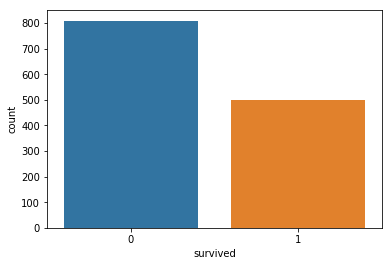

In [80]:
#bar chart of survival status count
sns.countplot(x='survived', data=df)

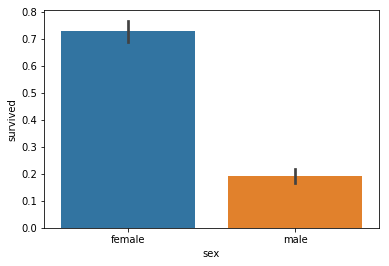

In [81]:
#survival status by sex
sns.barplot('sex', 'survived', data=df)

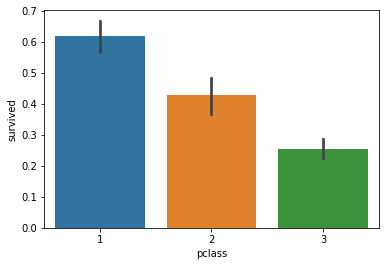

In [82]:
#survival rate by passenger class
sns.barplot('pclass', 'survived', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


[Text(0.5,0,'Age')]

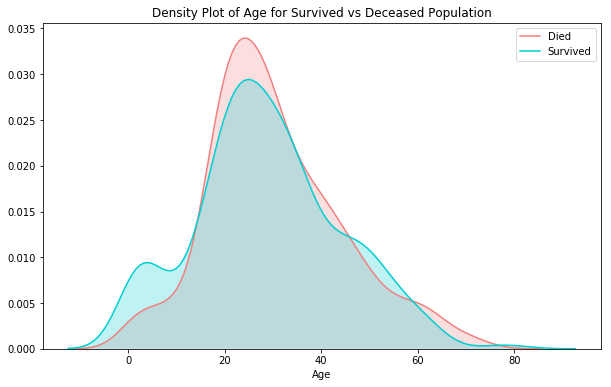

In [83]:
#plot age by survival status
plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['age'][df['survived'] == 0], #passengers that did not survive
            color="lightcoral",
            shade=True)

sns.kdeplot(df['age'][df['survived'] == 1], #passengers that survived
                 color="darkturquoise",
                 shade=True)

plt.legend (['Died', 'Survived'])
plt.title("Density Plot of Age for Survived vs Deceased Population")

ax.set(xlabel='Age') #have to define at least one plot as the axis; are layering two plots on top of another; will run in order
#plt.show()

#### Handle missing values

In [84]:
#find columns that have missing values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Let's clean up 'age' and 'embarked'

In [85]:
#rows where the age is missing
missing_age = df.loc[df['age'].isnull()]
missing_age.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [86]:
#get index numbers of missing rows - we'll use this later
mals = list(missing_age.index)

In [87]:
#table of avg age of passenger by survival status, sex, and passenger class
df.groupby(['survived', 'sex', 'pclass'])['age'].mean()

#way to get more distinct with filled-in data (fill in age based on more than one variable)

survived  sex     pclass
0         female  1         35.200000
                  2         34.090909
                  3         23.418750
          male    1         43.658163
                  2         33.092593
                  3         26.679598
1         female  1         37.109375
                  2         26.711051
                  3         20.814815
          male    1         36.168240
                  2         17.449274
                  3         22.436441
Name: age, dtype: float64

In [89]:
#fill missing values for age based on survival status, sex, and passenger class
df['age'].fillna(df.groupby(['survived', 'sex', 'pclass'])['age'].transform('mean'), inplace=True)

In [90]:
#verify filled missing values 
df.iloc[mals].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,43.658163,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,36.168240,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,43.658163,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,43.658163,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,37.109375,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [91]:
#verify there are no more missing age values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [92]:
#missing values for 'embarked'
embark = df.loc[df['embarked'].isnull()]
embark

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [93]:
#save index for missing values to verify later
embarkls = list(embark.index)

In [94]:
#only 2 missing values so we'll fill with most common embarkation point
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [96]:
#fill missing values
df['embarked'].fillna('S', inplace=True)

In [97]:
#check that they're filled
df.iloc[embarkls]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,6,NaN,"Cincinatti, OH"


In [98]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

Get rid of columns that we don't want to use in the model

In [99]:
modeldf = df.drop(['name','ticket','fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

In [100]:
#columns left in our dataframe
modeldf.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')

Create dummy variables for categorical values

In [101]:
#dummy variables for passenger class embarkation port
#get_dummies will auto-drop columns that dummies were created from
#creates column for each unique value that exists in that column, then uses 0/1 for true false
modeldf = pd.get_dummies(data=modeldf, columns=['pclass','embarked'])
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,1,female,29.0000,0,0,1,0,0,0,0,1
1,1,male,0.9167,1,2,1,0,0,0,0,1
2,0,female,2.0000,1,2,1,0,0,0,0,1
3,0,male,30.0000,1,2,1,0,0,0,0,1
4,0,female,25.0000,1,2,1,0,0,0,0,1


In [102]:
#change sex values to binary
#female=0, male=1
modeldf['sex'] = modeldf['sex'].map({'female':0, 'male':1})
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,1,0,29.0000,0,0,1,0,0,0,0,1
1,1,1,0.9167,1,2,1,0,0,0,0,1
2,0,0,2.0000,1,2,1,0,0,0,0,1
3,0,1,30.0000,1,2,1,0,0,0,0,1
4,0,0,25.0000,1,2,1,0,0,0,0,1


In [103]:
#create new column based on number of family members (not including the passenger)
#drop sibsp and parch columns
modeldf['family_num'] = modeldf['sibsp'] + modeldf['parch']
modeldf.drop(['sibsp', 'parch'], axis=1, inplace=True)
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,family_num
0,1,0,29.0000,1,0,0,0,0,1,0
1,1,1,0.9167,1,0,0,0,0,1,3
2,0,0,2.0000,1,0,0,0,0,1,3
3,0,1,30.0000,1,0,0,0,0,1,3
4,0,0,25.0000,1,0,0,0,0,1,3


In [104]:
modeldf['TravelAlone']=np.where((modeldf['family_num'] > 0), 0, 1)
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,family_num,TravelAlone
0,1,0,29.0000,1,0,0,0,0,1,0,1
1,1,1,0.9167,1,0,0,0,0,1,3,0
2,0,0,2.0000,1,0,0,0,0,1,3,0
3,0,1,30.0000,1,0,0,0,0,1,3,0
4,0,0,25.0000,1,0,0,0,0,1,3,0


## Logistic Regression

#### Split data into train and test

In [105]:
#extract target variable
#make copy of 'survived' column
y = modeldf['survived']

In [106]:
#copy of modeldf without 'survived' column
X = modeldf.drop(['survived'], axis=1)

In [107]:
#80% for training data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [108]:
#build logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
#accuracy score of model using training data
LogReg.score(X_train, y_train)

0.79942693409742116

In [110]:
#generate prediction values
y_pred = LogReg.predict(X_test)

In [111]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

cm

,Predicted Not Survival,Predicted Survival
True Not Survival,139,28
True Survival,28,67


In [112]:
#accuracy score of model on test data
LogReg.score(X_test, y_test)

0.7862595419847328

In [113]:
#from precision column, model is better at predicting passengers that do not survive
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       167
          1       0.71      0.71      0.71        95

avg / total       0.79      0.79      0.79       262



Sources:

https://nbviewer.jupyter.org/github/BigDataGal/Data-Mania-Demos/blob/master/Logistic%20Regression%20Demo.ipynb

https://mashimo.wordpress.com/2018/03/31/logistic-regression-using-sklearn/

https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python/notebook

https://datascienceplus.com/would-you-survive-the-titanic-getting-started-in-python/

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8